In [1]:
from pathlib import Path

import scipy.signal as signal
import matplotlib.pyplot as plt
import scipy.io as io
import numpy as np

In [2]:
data_path = Path("../../WA_shelf_FullData")

In [3]:
mat_files = sorted(list(data_path.glob("*.mat")))
len(mat_files)

2227

In [4]:
fs = 48000

In [5]:
def BandPass(inputSignal, bandLimits, freqSample):
    sos = signal.butter(4, bandLimits, 'bandpass', fs = freqSample, output='sos')
    outputSignal = signal.sosfilt(sos,inputSignal)
    
    return outputSignal

In [6]:
rms1_all, rms2_all = [], []
for f in mat_files:
    ff = io.loadmat(f)
    signal1 = ff["DataSegment1"][:,0]  # background channel 1 (deepest channel)
    signal2 = ff["DataSegment2"][:,0]  # transmission channel 1 (deepest channel)

    flimits = [3450, 3550]
    sos = signal.butter(4, flimits, 'bandpass', fs = fs, output='sos')
    signal1 = signal.sosfilt(sos,signal1)
    signal2 = signal.sosfilt(sos,signal2)

    rms1_all.append(np.sqrt(np.mean(np.square(signal1.astype('float')))))
    rms2_all.append(np.sqrt(np.mean(np.square(signal2.astype('float')))))

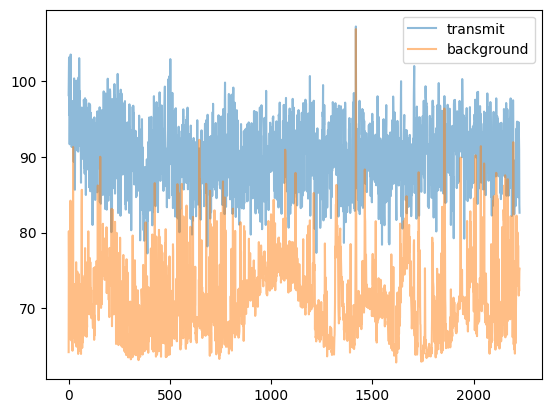

In [7]:
plt.plot(20*np.log10(rms2_all), alpha=0.5, label="transmit")
plt.plot(20*np.log10(rms1_all), alpha=0.5, label="background")
plt.legend()
plt.show()

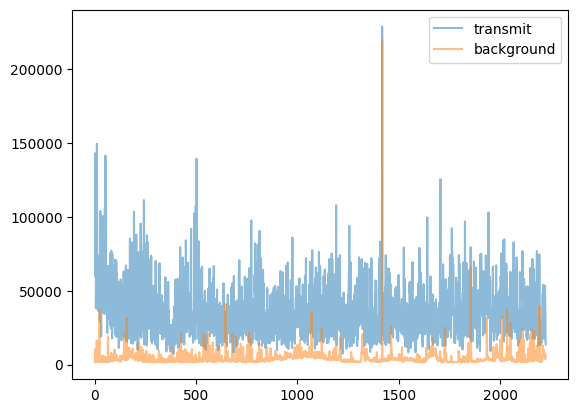

In [8]:
plt.plot(rms2_all, alpha=0.5, label="transmit")
plt.plot(rms1_all, alpha=0.5, label="background")
plt.legend()
plt.show()

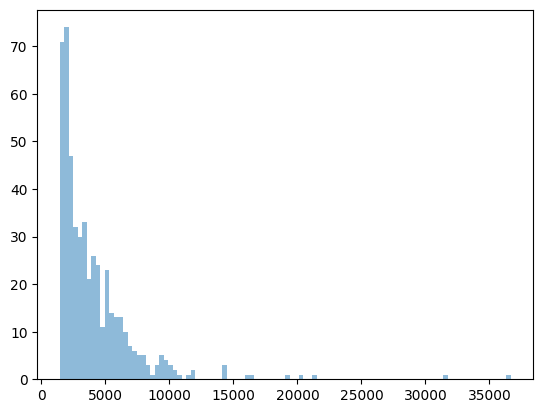

In [9]:
_ = plt.hist(rms1_all[:500], bins=100, alpha=0.5)


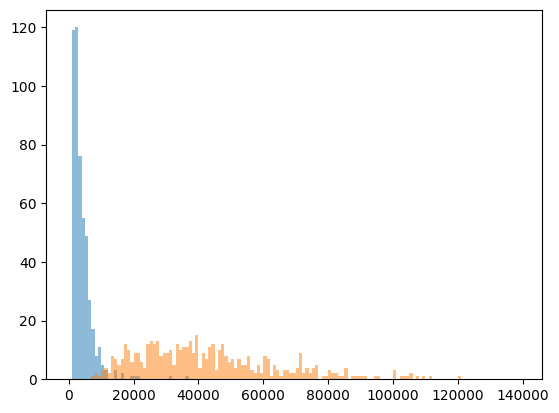

In [10]:
_ = plt.hist(rms1_all[:500], bins=np.arange(0, 140000, 1000), alpha=0.5)
_ = plt.hist(rms2_all[:500], bins=np.arange(0, 140000, 1000), alpha=0.5)

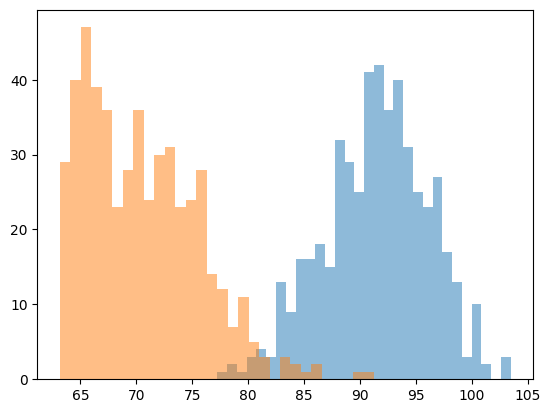

In [11]:
_ = plt.hist(20*np.log10(rms2_all[:500]), bins=30, alpha=0.5)
_ = plt.hist(20*np.log10(rms1_all[:500]), bins=30, alpha=0.5)


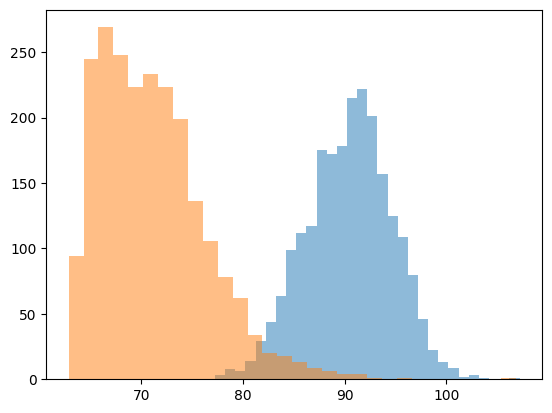

In [12]:
_ = plt.hist(20*np.log10(rms2_all), bins=30, alpha=0.5)
_ = plt.hist(20*np.log10(rms1_all), bins=30, alpha=0.5)


In [13]:
mat_file = io.loadmat('../../WA_shelf_FullData/rxm_5069_ping_220728211219.mat')

fs = 48000

In [14]:
signal1.shape

(48000,)

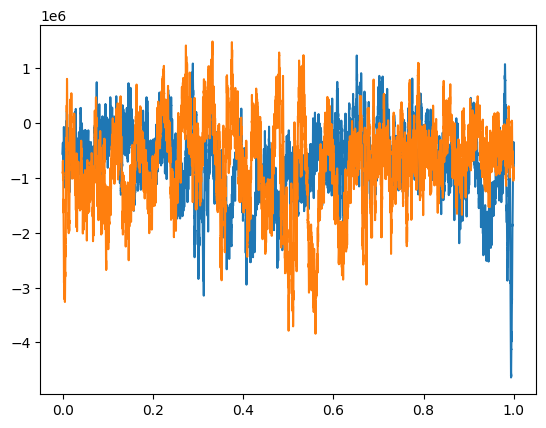

In [15]:
signal1 = mat_file['DataSegment1']
signal2 = mat_file['DataSegment2']

signal1_1 = signal1[:,0]
signal2_1 = signal2[:,0]

time_vec = np.arange(0, 1, 1. / fs)

plt.plot(time_vec,signal1_1,time_vec,signal2_1)
plt.show()


In [16]:
flimits = [3450, 3550]
sos = signal.butter(4, flimits, 'bandpass', fs = 48000, output='sos')
sigfilt1_1 = signal.sosfilt(sos,signal1_1)
sigfilt2_1 = signal.sosfilt(sos,signal2_1)

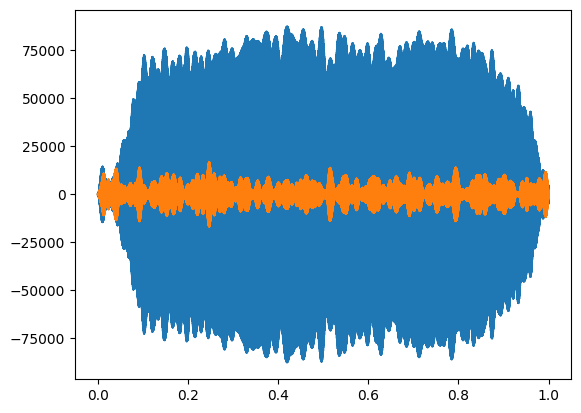

In [17]:
plt.plot(time_vec,sigfilt2_1,time_vec,sigfilt1_1)
plt.show()

In [18]:
def BandPass(inputSignal, bandLimits, freqSample):
    sos = signal.butter(4, bandLimits, 'bandpass', fs = freqSample, output='sos')
    outputSignal = signal.sosfilt(sos,inputSignal)
    
    return outputSignal

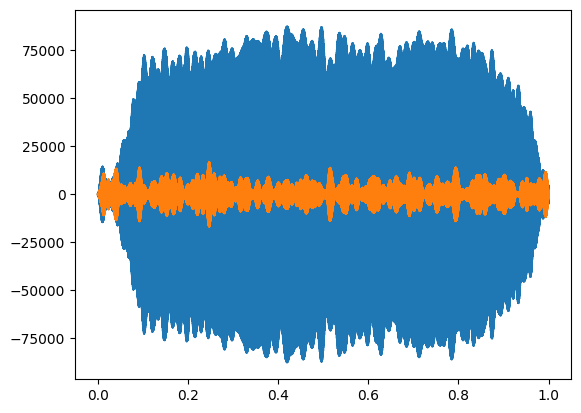

In [19]:
sigfilt1_1a = BandPass(signal1_1,flimits,fs)
sigfilt2_1a = BandPass(signal2_1,flimits,fs)

plt.plot(time_vec,sigfilt2_1a,time_vec,sigfilt1_1a)
plt.show()

In [20]:
bg_all, tr_all = [], []
for f in mat_files:
    ff = io.loadmat(f)
    bg_ch4 = ff["DataSegment1"][:,-1]  # background channel 1 (deepest channel)
    tr_ch4 = ff["DataSegment2"][:,-1]  # transmission channel 1 (deepest channel)

    flimits = [3450, 3550]
    sos = signal.butter(4, flimits, 'bandpass', fs = fs, output='sos')
    bg_ch4_filt = signal.sosfilt(sos,bg_ch4)
    tr_ch4_filt = signal.sosfilt(sos,tr_ch4)

    bg_all.append(np.sqrt(np.mean(np.square(bg_ch4_filt.astype('float')))))
    tr_all.append(np.sqrt(np.mean(np.square(tr_ch4_filt.astype('float')))))

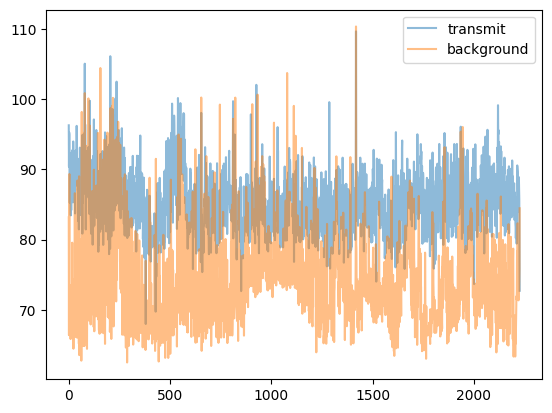

In [21]:
plt.plot(20*np.log10(tr_all), alpha=0.5, label="transmit")
plt.plot(20*np.log10(bg_all), alpha=0.5, label="background")
plt.legend()
plt.show()

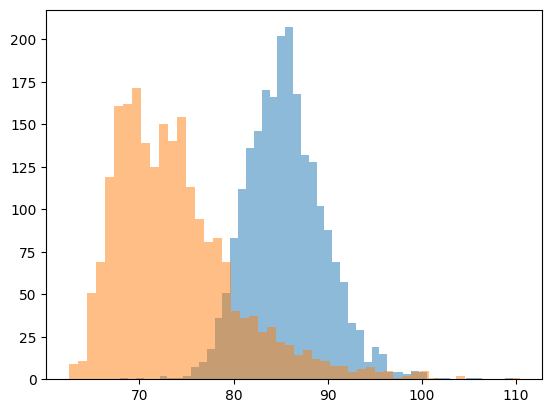

In [22]:
_ = plt.hist(20*np.log10(tr_all), bins=50, alpha=0.5, label="transmit")
_ = plt.hist(20*np.log10(bg_all), bins=50, alpha=0.5, label="background")

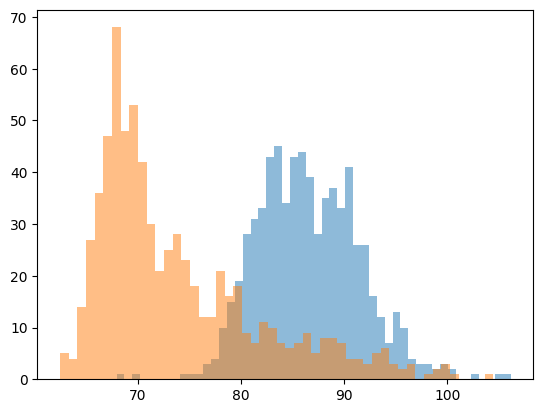

In [23]:
_ = plt.hist(20*np.log10(tr_all[:700]), bins=50, alpha=0.5, label="transmit")
_ = plt.hist(20*np.log10(bg_all[:700]), bins=50, alpha=0.5, label="background")

In [24]:
mat_files[200]

PosixPath('../../WA_shelf_FullData/rxm_5069_ping_220727093625.mat')

In [25]:
ff = io.loadmat(mat_files[350])
bg_ch4 = np.array(ff["DataSegment1"][:,-1])  # background channel 1 (deepest channel)
tr_ch4 = np.array(ff["DataSegment2"][:,-1])  # transmission channel 1 (deepest channel)

In [26]:
bg_ch4_filt = signal.sosfilt(sos,bg_ch4)
tr_ch4_filt = signal.sosfilt(sos,tr_ch4)

(array([[9.28623917e+10, 7.71935675e+10, 9.54532243e+10, ...,
         6.98365197e+10, 1.46483331e+11, 8.09472345e+10],
        [3.38120618e+10, 5.10076351e+10, 4.99816342e+10, ...,
         3.06860123e+10, 7.71757145e+10, 4.12983252e+10],
        [3.84302449e+09, 3.26445832e+09, 9.59319793e+08, ...,
         3.21923778e+08, 2.84029980e+08, 6.26012281e+07],
        ...,
        [2.70638742e+02, 1.25396398e+03, 5.92861812e+02, ...,
         6.98300924e+02, 1.08586563e+01, 1.52127996e+03],
        [7.41989104e+01, 2.07322699e+02, 1.12695764e+02, ...,
         1.11295765e+03, 2.37361687e+02, 9.83436874e+01],
        [3.64768145e+02, 1.34549069e+02, 6.15028880e+01, ...,
         1.77784052e+02, 1.26872614e+02, 5.87453133e+02]]),
 array([    0.   ,    46.875,    93.75 ,   140.625,   187.5  ,   234.375,
          281.25 ,   328.125,   375.   ,   421.875,   468.75 ,   515.625,
          562.5  ,   609.375,   656.25 ,   703.125,   750.   ,   796.875,
          843.75 ,   890.625,   937.5  ,   

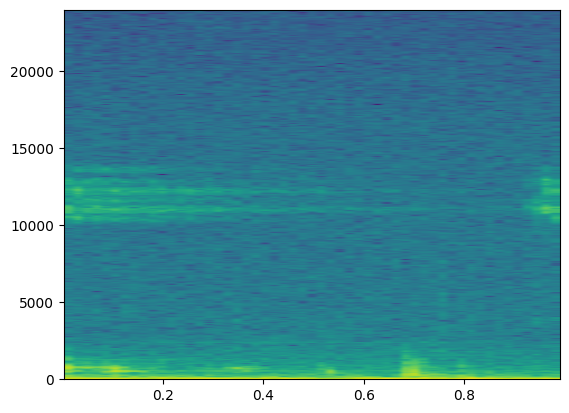

In [27]:
plt.specgram(bg_ch4, NFFT=1024, Fs=fs)

(array([[3.53244805e+10, 1.25328124e+10, 5.56228973e+10, ...,
         4.93422851e+10, 1.03341459e+11, 1.49807686e+11],
        [3.10616123e+10, 1.84026929e+10, 2.25495955e+10, ...,
         2.37723435e+10, 5.89150204e+10, 7.54841560e+10],
        [1.55743534e+10, 4.11579960e+10, 2.72251800e+09, ...,
         5.03175464e+08, 1.34159823e+09, 8.02110054e+08],
        ...,
        [8.07718945e+02, 4.94314001e+02, 5.34983929e+02, ...,
         1.36635255e+03, 4.75766225e+01, 1.39415289e+02],
        [8.11491780e+02, 7.38359288e+02, 5.84806525e+02, ...,
         2.76567109e+02, 4.25568347e+01, 7.40039059e+01],
        [8.05192346e+02, 2.00730391e+01, 3.54494816e+01, ...,
         9.01165465e+01, 3.11672558e-01, 1.94305492e-01]]),
 array([    0.   ,    46.875,    93.75 ,   140.625,   187.5  ,   234.375,
          281.25 ,   328.125,   375.   ,   421.875,   468.75 ,   515.625,
          562.5  ,   609.375,   656.25 ,   703.125,   750.   ,   796.875,
          843.75 ,   890.625,   937.5  ,   

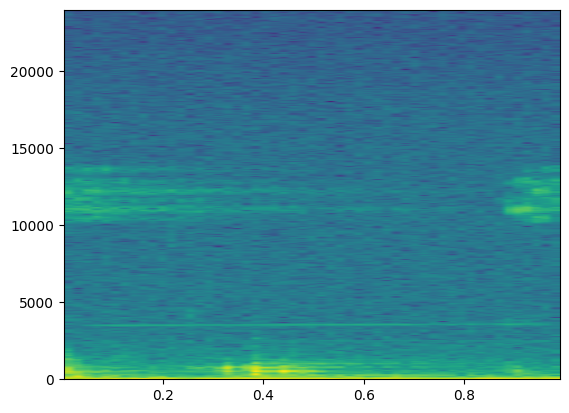

In [28]:
plt.specgram(tr_ch4, NFFT=1024, Fs=fs)

In [29]:
io.wavfile.write("tr_350.wav", rate=fs, data=tr_ch4/tr_ch4.max())
io.wavfile.write("bg_350.wav", rate=fs, data=bg_ch4/bg_ch4.max())

In [30]:
tr_ch4

array([3775215.56176974, 3537742.3248197 , 3659523.47197357, ...,
       2435622.94307725, 2606116.54909266, 2782699.21246576])

In [31]:
Path.cwd()

PosixPath('/workspaces/fundamentals/boat_tutorials/exercises')

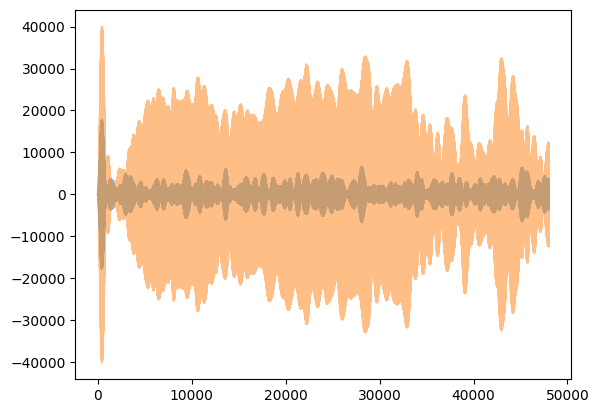

In [32]:
plt.plot(bg_ch4_filt, alpha=0.5)
plt.plot(tr_ch4_filt, alpha=0.5)
plt.show()

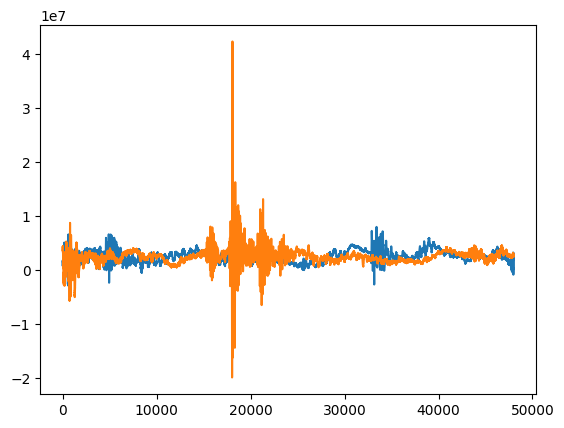

In [33]:
plt.plot(bg_ch4)
plt.plot(tr_ch4)
plt.show()

In [34]:
tr_all

[np.float64(65254.059846116994),
 np.float64(33109.88751280722),
 np.float64(58081.918586599146),
 np.float64(55896.40115321564),
 np.float64(34396.77272800156),
 np.float64(18297.13619098917),
 np.float64(32817.71399330883),
 np.float64(31543.913130575234),
 np.float64(37904.04271638574),
 np.float64(41496.57499549414),
 np.float64(14883.241644959862),
 np.float64(31049.200283348884),
 np.float64(16195.751678237328),
 np.float64(33633.0813632448),
 np.float64(27511.277388199615),
 np.float64(38302.482551827525),
 np.float64(32805.68052859309),
 np.float64(26209.135469101206),
 np.float64(43480.27441125667),
 np.float64(32547.650316295174),
 np.float64(27597.809751671422),
 np.float64(18429.114327567266),
 np.float64(50065.47581005891),
 np.float64(31688.98913017396),
 np.float64(38832.47707260917),
 np.float64(25212.772340459618),
 np.float64(22279.700796560035),
 np.float64(18940.65089419968),
 np.float64(40324.17391198608),
 np.float64(40218.31096861362),
 np.float64(25166.070864944

# Split data for fitting and prediction

In [35]:
# first part is to select model parameter from cleaner samples
X_bg = 20*np.log10(bg_all[:700])
X_tr = 20*np.log10(tr_all[:700])

In [36]:
# second part is to select samples to test the hypothesis of the two distributions
Y_bg = 20*np.log10(bg_all[700:1400])
Y_tr = 20*np.log10(tr_all[700:1400])

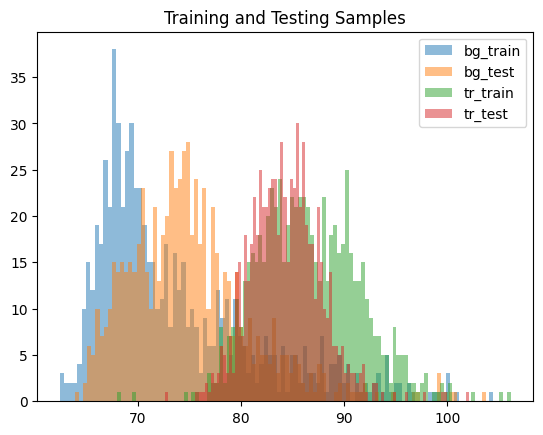

In [37]:
plt.title("Training and Testing Samples")
plt.hist(X_bg, bins=100, alpha=0.5, label='bg_train')
plt.hist(Y_bg, bins=100, alpha=0.5, label='bg_test')
plt.hist(X_tr, bins=100, alpha=0.5, label='tr_train')
plt.hist(Y_tr, bins=100, alpha=0.5, label='tr_test')
plt.legend()

In [38]:
np.save('tr_all.npy', tr_all)
np.save('bg_all.npy', bg_all)